In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/raw/weather/weather_nyc_2023-01-01_to_2024-12-31.csv')

df['date'] = pd.to_datetime(df['date'])
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

print(f"Loaded {len(df)} days of weather data")
print(f"\nColumns: {df.columns.tolist()}")
df.head()


Date range: 2023-01-01 00:00:00 to 2024-12-31 00:00:00
Loaded 731 days of weather data

Columns: ['date', 'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'windspeed_10m_max', 'weathercode']


,date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,snowfall_sum,windspeed_10m_max,weathercode
0,2023-01-01,8.785417,11.95,4.95,1.1,1.1,0.0,17.399586,55.0
1,2023-01-02,7.981249,12.85,4.55,0.6,0.6,0.0,9.000000,51.0
2,2023-01-03,9.691669,12.85,6.30,9.4,9.4,0.0,19.373219,63.0
3,2023-01-04,13.081250,18.00,9.55,2.3,2.3,0.0,18.218275,53.0
4,2023-01-05,9.912500,13.15,7.45,0.0,0.0,0.0,12.074766,3.0


In [4]:
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 731 non-null    datetime64[ns]
 1   temperature_2m_mean  731 non-null    float64       
 2   temperature_2m_max   731 non-null    float64       
 3   temperature_2m_min   731 non-null    float64       
 4   precipitation_sum    731 non-null    float64       
 5   rain_sum             731 non-null    float64       
 6   snowfall_sum         731 non-null    float64       
 7   windspeed_10m_max    731 non-null    float64       
 8   weathercode          731 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 51.5 KB
                      date  temperature_2m_mean  temperature_2m_max  \
count                  731           731.000000          731.000000   
mean   2024-01-01 00:00:00            13.026129           18.003420

In [5]:
print(df.isnull().sum())

date                   0
temperature_2m_mean    0
temperature_2m_max     0
temperature_2m_min     0
precipitation_sum      0
rain_sum               0
snowfall_sum           0
windspeed_10m_max      0
weathercode            0
dtype: int64


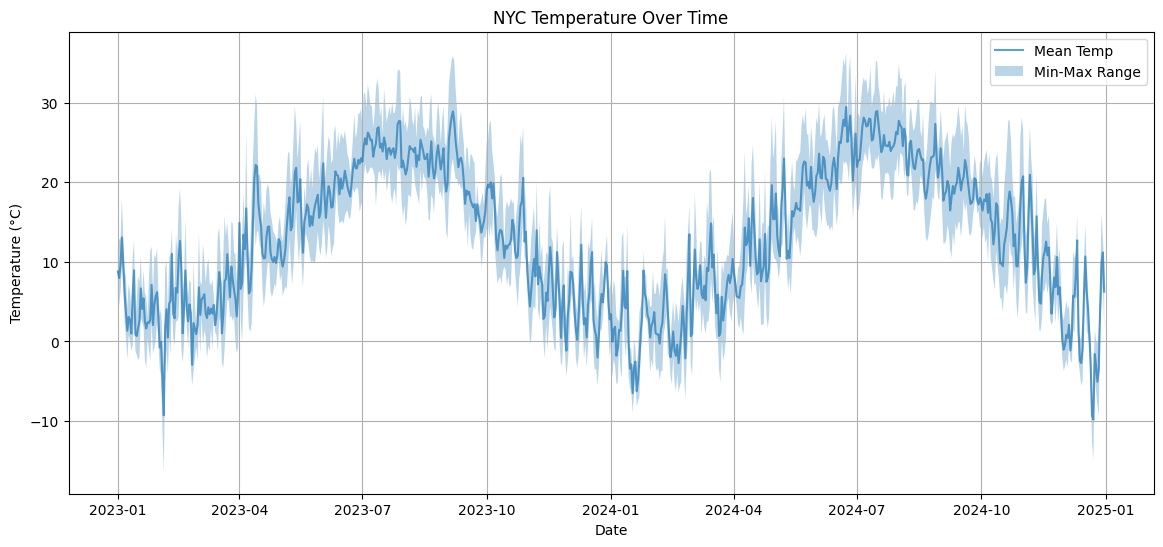

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['temperature_2m_mean'], label='Mean Temp', alpha=0.7)
plt.fill_between(df['date'], df['temperature_2m_min'], df['temperature_2m_max'], alpha=0.3, label='Min-Max Range')
plt.title('NYC Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

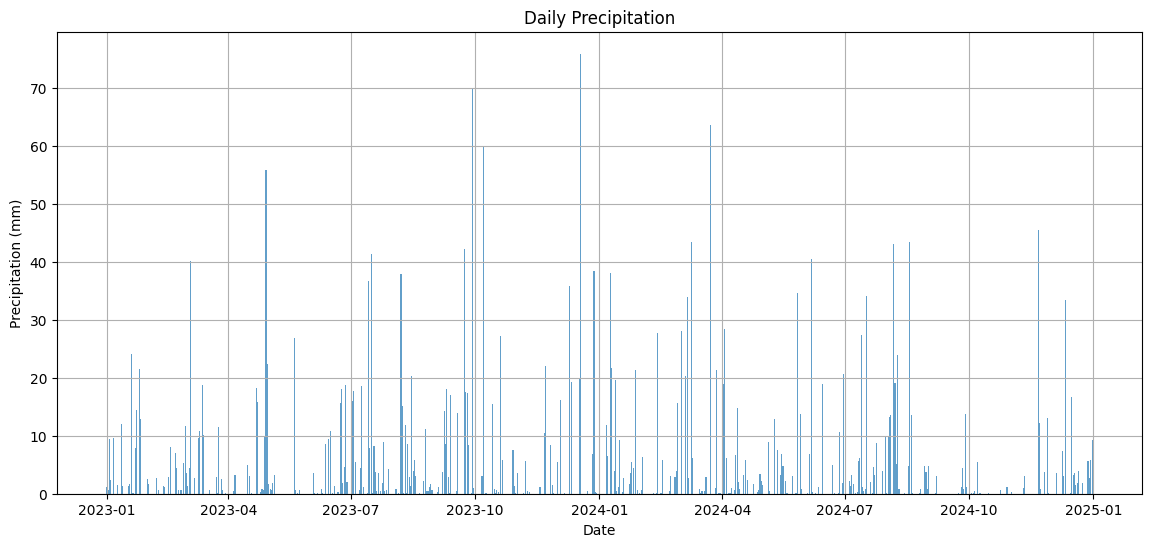

In [7]:
plt.figure(figsize=(14, 6))
plt.bar(df['date'], df['precipitation_sum'], alpha=0.7)
plt.title('Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid()
plt.show()

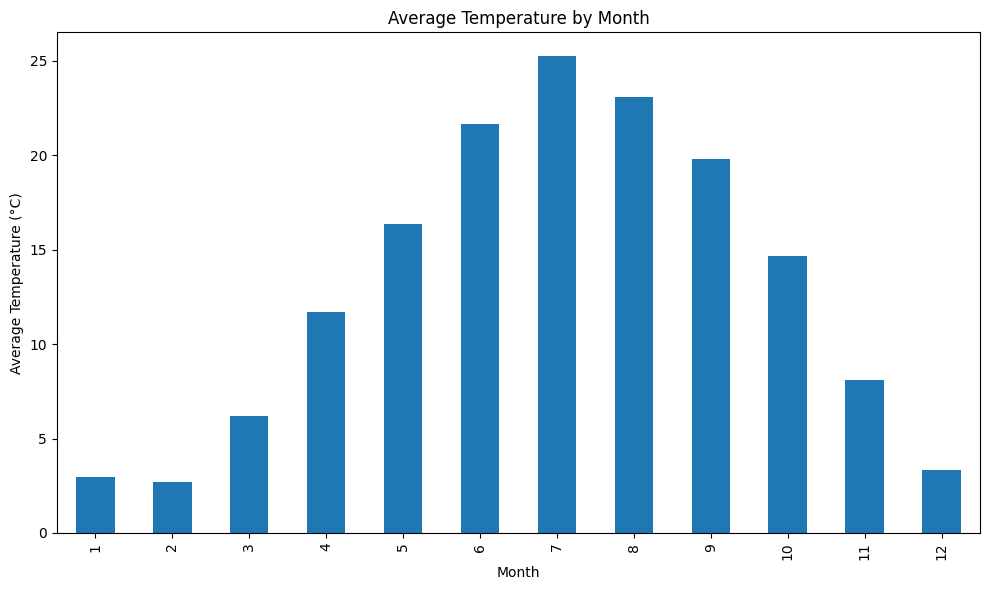

In [8]:
df['month'] = df['date'].dt.month
monthly_avg = df.groupby('month')['temperature_2m_mean'].mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show()